<a href="https://colab.research.google.com/github/avats-dev/ML4CV/blob/main/ML4CV_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import *

import numpy as np
from matplotlib import pyplot as plt

In [2]:
tf.__version__

'2.4.1'

In [3]:
fashion_mnist = datasets.fashion_mnist
(train_images,  train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
train_images.shape

(60000, 28, 28)

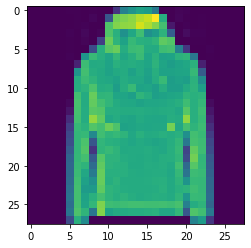

In [7]:
plt.imshow(train_images[720])

In [67]:
def cus_loss(y_true, y_pred):
  y_pred = tf.convert_to_tensor(y_pred)
  y_true = tf.cast(y_true, y_pred.dtype)
  l_1 = tf.reduce_mean(tf.abs(y_pred - y_true))
  return l_1

In [77]:
#from tensorflow.keras import layers
model = Sequential()
model.add(layers.Flatten(input_shape = (28,28)))

In [78]:
model.add(layers.Dense(128, activation='relu', use_bias=True,
                       kernel_initializer = 'glorot_uniform'
                       ))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu', use_bias=True))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu', use_bias=True))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu', use_bias=True))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

In [79]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)              

In [83]:

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy',])

In [84]:
model.fit(train_images, train_labels, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6566 - accuracy: 0.7662
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5860 - accuracy: 0.7797
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5681 - accuracy: 0.7829
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5792 - accuracy: 0.7662
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5889 - accuracy: 0.7474
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5872 - accuracy: 0.7604
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5955 - accuracy: 0.7488
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5806 - accuracy: 0.7502
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6101 - accuracy: 0.7423
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [85]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5505 - accuracy: 0.7689


[0.550504744052887, 0.7688999772071838]

In [127]:
from keras.models import Model
from keras import Input
layer1 = Input((28,28))
flat1 = layers.Flatten()(layer1)
dense1 = layers.Dense(128, activation = 'relu')(flat1)
dense1 = layers.Dropout(0.2)(dense1)
dense1 = layers.Dense(256, activation = 'relu')(dense1)
dense1 = layers.Dropout(0.1)(dense1)
dense1 = layers.Dense(512, activation = 'relu')(dense1)
dense1 = layers.Dropout(0.1)(dense1)
dense1 = layers.Dense(256, activation = 'relu')(dense1)
dense1 = layers.Dropout(0.1)(dense1)
dense1 = layers.Dense(128, activation = 'relu')(dense1)
dense2 = layers.Dense(10, activation = 'softmax')(dense1)
model = Model(inputs = layer1, outputs = dense2)

In [128]:
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_26 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_27 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 512)               1315

In [129]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy',])

In [130]:
model.fit(train_images, train_labels, batch_size=32, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 2.1771 - accuracy: 0.6068
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6478 - accuracy: 0.7619
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5744 - accuracy: 0.7851
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5653 - accuracy: 0.7943
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5321 - accuracy: 0.8035
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5219 - accuracy: 0.8071
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5163 - accuracy: 0.8096
Epoch 8/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5166 - accuracy: 0.8046
Epoch 9/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5108 - accuracy: 0.8151
Epoch 10/20
1875/1875 [==============================] - 12s 6ms/step - l

In [131]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4715 - accuracy: 0.8505


[0.47152432799339294, 0.8504999876022339]